# 도커 개발환경 세팅

## 도커 데스크탑 설치
- 윈도우의 경우 wsl 옵션 반드시 켜고 설치할것!

- 설치 후 파워셸에서 확인
```bash
docker -v
```

## 도커 개발환경 이미지 생성

```docker
# 작업 환경 이미지

# 베이스 이미지 설정 -> 개인 서버에 맞춤
FROM ubuntu:22.04

# 기본 환경 설치 명령어 -> 파이썬 3.10
RUN apt-get update && apt-get install -y python3.10 python3-pip

# openssh 서버 설치
RUN apt-get install -y openssh-server

# git 설치
RUN apt-get install -y git

# vim 설치
RUN apt-get install -y vim

# # pkg-config 설치
RUN apt-get install -y pkg-config && \
apt-get install -y libcairo2-dev && \
apt-get install -y libgirepository1.0-dev

# cuda 지원 pytorch 설치
RUN pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# 장고 설치
RUN pip3 install django && pip3 install djangorestframework

# # 작업 디렉토리 생성
RUN mkdir -p /home/workspaces

# # 작업 디렉토리 설정
WORKDIR /home/workspaces

# # requirements_docker.txt 복사
COPY requirements_docker.txt /home/workspaces

# # requirements_docker.txt 설치
RUN pip3 install -r requirements_docker.txt

# 크롬 설치 -> sellenium
RUN apt-get install wget -y
RUN wget -q -O - https://dl-ssl.google.com/linux/linux_signing_key.pub | apt-key add -
RUN sh -c 'echo "deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main" >> /etc/apt/sources.list.d/google.list'
RUN apt-get update -y && apt-get install google-chrome-stable -y
RUN wget http://dl.google.com/linux/chrome/deb/pool/main/g/google-chrome-stable/google-chrome-stable_114.0.5735.198-1_amd64.deb && \
dpkg -i google-chrome-stable_114.0.5735.198-1_amd64.deb && \
apt-mark hold google-chrome-stable
```

## 이미지 푸시

```bash
docker push parkingplace/ezpz_workspace
```

## 도커 개발환경 이미지 다운(풀)
```bash
docker pull parkingplace/ezpz_workspace
```

### 마운트 할 볼륨 세팅
- 어딘가/docker/volume 생성
- volume 폴더 밑에 data 폴더 생성
- /docker/volume에 깃 클론

#### 예시
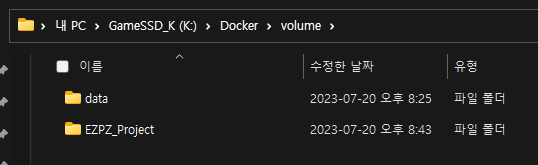

## 도커 컨테이너 실행

```bash
docker run --name ezpz_docker --hostname EZPZ_DOCKER -v K:\Docker\volume:/home/workspaces --ipc host --privileged -it parkingplace/ezpz_workspace:latest
```

- run
    - 컨테이너 생성 명령
- --name ezpz_docker
    - 컨테이너의 이름 설정
- --hostname EZPZ_DOCKER
    - 호스트 네임(내부의 기기 이름 설정)
- -v K:\Docker\volume:/home/workspaces
    - 볼륨 마운트 설정
    - {호스트 경로}:{도커 내 경로}
    - 이 경우 K:\Docker\volume 폴더의 내용이 내부에서는 /home/workspaces 에서 보임
- --ipc host
    - 메모리 사용량 관련 오류 해결용
- -p 8888:80 -p 8433:433 ...
    - 포트 설정 옵션
    - 8888 포트를 컨테이너의 80 포트와 연결해줌
- --privileged
    - 시스템내 장치 접근 등을 위한 옵션
- -it
    - i, t 옵션 (밑에서 설명)
- parkingplace/ezpz_workspace:latest
    - parkingplace 계정의 ezpz_workspace 이미지의 latest 태그인 이미지 사용



    - 그외 옵션 설명
        - -i: 사용자가 입출력 할 수 있는 상태
        - -t: 가상 터미널 환경을 에뮬레이션 하겠다.
        - -d: 컨테이너를 일반 프로세스가 아닌 데몬프로세스로 실행하여 프로세스가 끝나도 유지되도록 한다.
        - -e: 환경변수 설정, 옵션을 사용하면 Dockerfile의 ENV 설정도 덮어써지게 된다.
        - -h: 컨테이너의 호스트 이름을 설정한다.
        - --link: Docker 컨테이너끼리 연결할 때는 docker run 명령에서 --link 옵션을 사용
        - --rm: 컨테이너를 일회성으로 실행할 때 주로 쓰이는데, 컨테이너가 종료될 때 컨테이너와 관련된 리소스(파일 시스템, 볼륨)까지 깨끗이 제거해준다.

### 이후 실행시 명령
```bash
docker start ezpz_docker
```

## VS Code 설정

### 확장 프로그램 설치
- Dev Containers

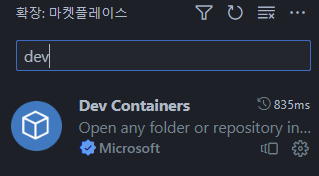

- Docker

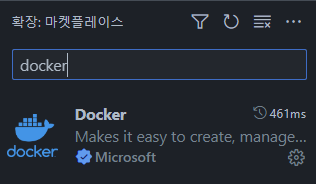

### 개발환경에서 개발하기

- 둘중 하나만 하면 됨

1. ctrl(cmd) + shift + p
    1. dev containers : 실행중인 컨테이너에 연결
    1. ezpz_docker 선택
    
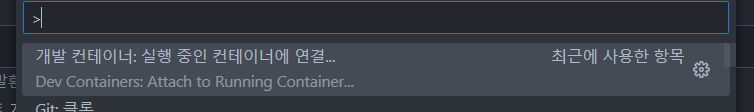

2. Docker 탭
    1. 도커 탭 들어가기
    1. 실행중인 컨테이너 확인
    1. 오른쪽 클릭 후 Attatch VS Code

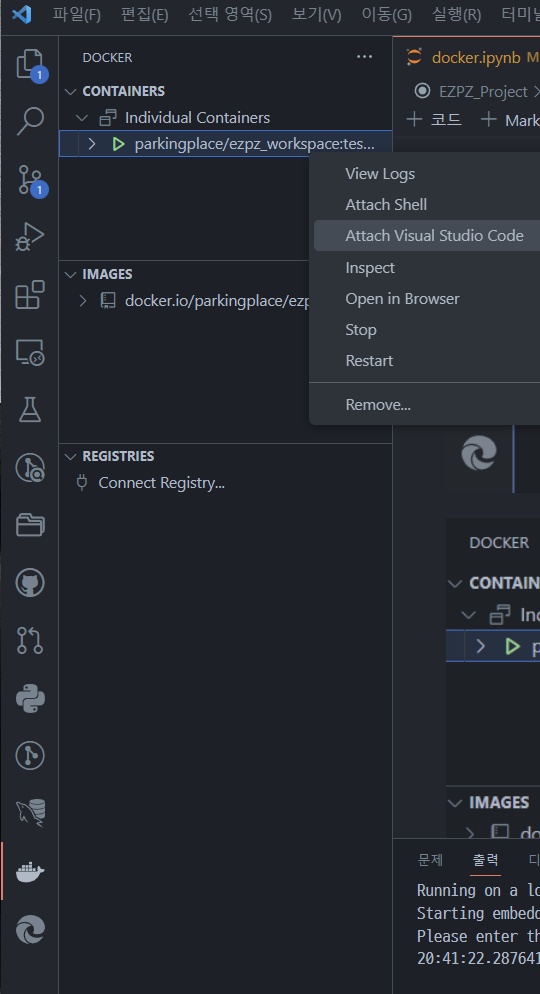

### 자신에게 맞는 개발 환경 세팅하기(처음 한번만)
1. 마운트한 볼륨으로 개발환경 세팅
    1. 파일 탭
    2. 폴더 열기
    3. /home/workspaces 폴더 선택

1. 확장 설치 
    - 컨테이너 내 VScode 서버이므로 자신이 사용하던 확장 설치하면 됨
    - 이미 PC에서 사용하던 확장중 컨테이너에 설치해야 하는것만 버튼이 나옴

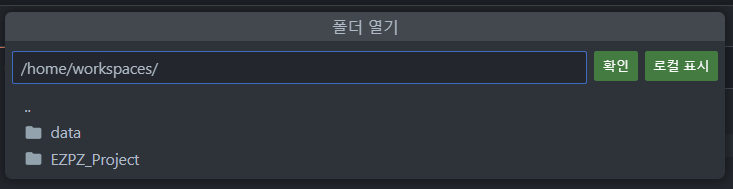

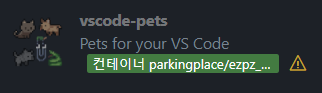

# 테스트겸 메모용 코드임

```bash
docker container run -it --name '컨테이너이름' --hostname '커널에서 표시될 이름' -v 프로젝트경로:컨테이너내 공유할 경로 -p 외부포트:내부포트  -p 80:80 -p 8080:8080 -p 3000:3000 parkingplace/ezpz_workspace:test3

docker container run -it --name 'ezpz_con' --hostname 'ezpz_con' -v E:\\Python\\EZPZ_Project:/home/worckspace/EZPZ_Project -v E:\\Python\\data:/home/worckspace/data -p 80:80 -p 8080:8080 -p 8888:8888 -p 3000:3000 parkingplace/ezpz_workspace:test3

sudo docker run --name test --hostname TEST --restart always --gpus all --ipc host --privileged -p 17022:22 -p 17888:8888 -p 18889:8889 -p 18786:8786 -p 18787:8787 -it parkingplace/ezpz_workspace:test3

docker run --name test --hostname TEST --ipc host --privileged -p 17022:22 -p 17888:8888 -p 18889:8889 -p 18786:8786 -p 18787:8787 -it parkingplace/ezpz_workspace:test2
```

```bash
docker run --name ezpz_docker --hostname EZPZ_DOCKER -v E:\Docker\volume:/home/workspaces --ipc host --privileged -p 17022:22 -p 17888:8888 -p 18889:8889 -p 18786:8786 -p 18787:8787 -it parkingplace/ezpz_workspace:test5
docker run --gpus all --name ezpz_docker --hostname EZPZ_DOCKER -v ~/docker/volume:/home/workspaces --ipc host --privileged -p 17022:22 -p 17888:8888 -p 18889:8889 -p 18786:8786 -p 18787:8787 -it parkingplace/ezpz_workspace:test5
docker run --name ezpz_docker --hostname EZPZ_DOCKER -v ~/docker/volume:/home/workspaces --ipc host --privileged -p 17022:22 -p 17888:8888 -p 18889:8889 -p 18786:8786 -p 18787:8787 -it parkingplace/ezpz_workspace:test5
```